In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
# Function to read the CSV file containing the metrics
def read_metrics_from_csv(filename="dos_attack_metrics.csv", only_successful_requests=True):
    data = pd.read_csv("./pen_test/" + filename)
    if only_successful_requests:
        data = data[data['response_status'] != "Error"]
        pass
    return data

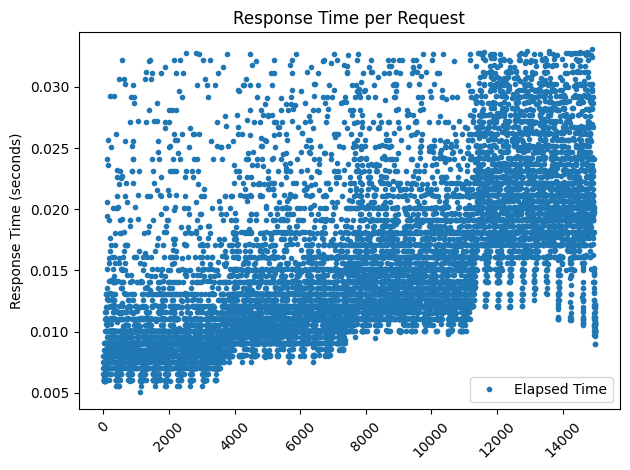

In [94]:
df = read_metrics_from_csv(
    filename="dos_attack_metrics.csv",
    only_successful_requests=True)

# remove outliers
df = df[df['elapsed_time'] < df['elapsed_time'].quantile(0.95)]
    
plt.plot(df['elapsed_time'], '.', label='Elapsed Time')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time per Request')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

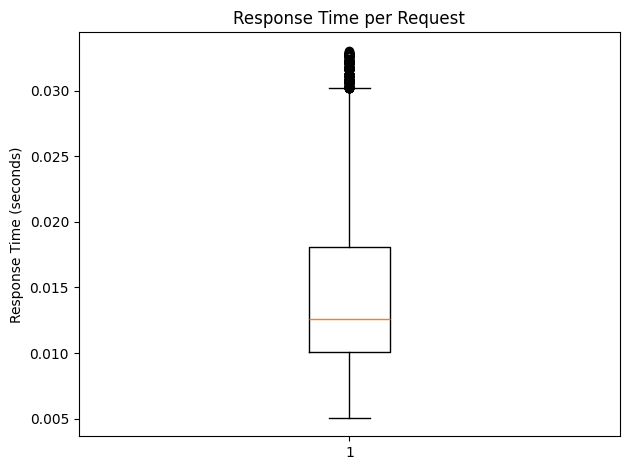

Average response time: 0.014566031495548767 seconds
Interval of confidence: 0.002584313027269164 - 0.02654774996382837 seconds


In [95]:
# boxplot
plt.boxplot(df['elapsed_time'])
plt.ylabel('Response Time (seconds)')
plt.title('Response Time per Request')
plt.tight_layout()
plt.show()

# average response time
print(f"Average response time: {df['elapsed_time'].mean()} seconds")
# interval of confidence
print(f"Interval of confidence: {df['elapsed_time'].mean() - 2 * df['elapsed_time'].std()} - {df['elapsed_time'].mean() + 2 * df['elapsed_time'].std()} seconds")